# **Optimization Functions** Working flow


1.   Adagrad
2.   RMSProp
3.   AdaDelta
4.   Adam
5.   Nadam

## 1. **Adagrad**

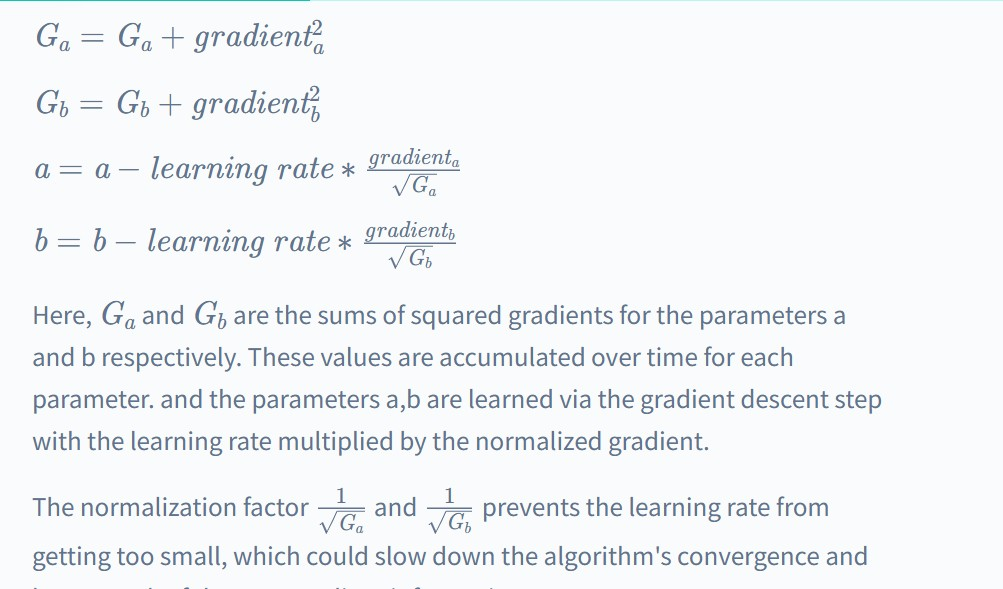

In [ ]:
import numpy as np

# Define the test function
def f(x):
    return x[0]**2 + 2*x[1]**2

In [ ]:
# Define the gradient of the test function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Set the initial values of x
x = np.array([10, 10])

# Set the learning rate and the initial value of the sum of the squares of the gradients
learning_rate = 0.1
sum_squares_gradients = np.zeros_like(x)

# Perform gradient descent for a fixed number of iterations
for i in range(100):
    # Compute the gradient of the cost function
    gradient = grad_f(x)
    # Update the sum of the squares of the gradients
    sum_squares_gradients += (gradient**2).astype(sum_squares_gradients.dtype)
    # Update the parameters using AdaGrad
    x = x.astype(float)  # or x = x.astype(np.float64)
    x -= learning_rate * gradient / np.sqrt(sum_squares_gradients + 1e-7)

# Print the final values of the parameters
print(x)

[8.20722233 8.20805769]


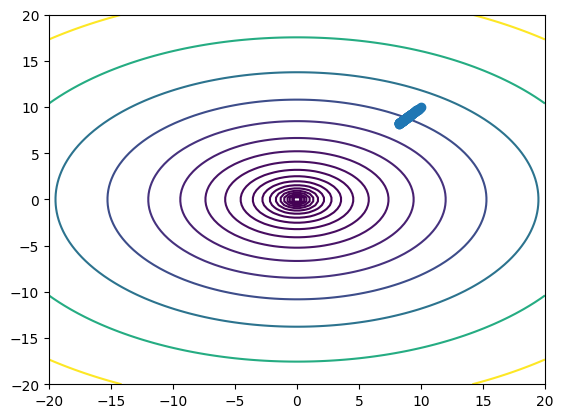

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a grid of points to evaluate the cost function
X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = f(np.array([X, Y]))

# Set the initial values of x
x = np.array([10, 10])

# Set the learning rate and the initial value of the sum of the squares of the gradients
learning_rate = 0.1
sum_squares_gradients = np.zeros_like(x)

# Initialize a list to store the values of x at each iteration
x_values = [x.copy()]

# Perform gradient descent for a fixed number of iterations
for i in range(100):
    # Compute the gradient of the cost function
    gradient = grad_f(x)
    # Update the sum of the squares of the gradients
    sum_squares_gradients += (gradient**2).astype(sum_squares_gradients.dtype)
    # Update the parameters using AdaGrad
    x = x.astype(float)  # or x = x.astype(np.float64)
    x -= learning_rate * gradient / np.sqrt(sum_squares_gradients + 1e-7)
    # Store the values of x at each iteration
    x_values.append(x.copy())

# Convert the list of x values to a numpy array
x_values = np.array(x_values)

# Plot the cost function
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20))

# Plot the trajectory of the parameters
plt.plot(x_values[:, 0], x_values[:, 1], '-o')

# Show the plot
plt.show()


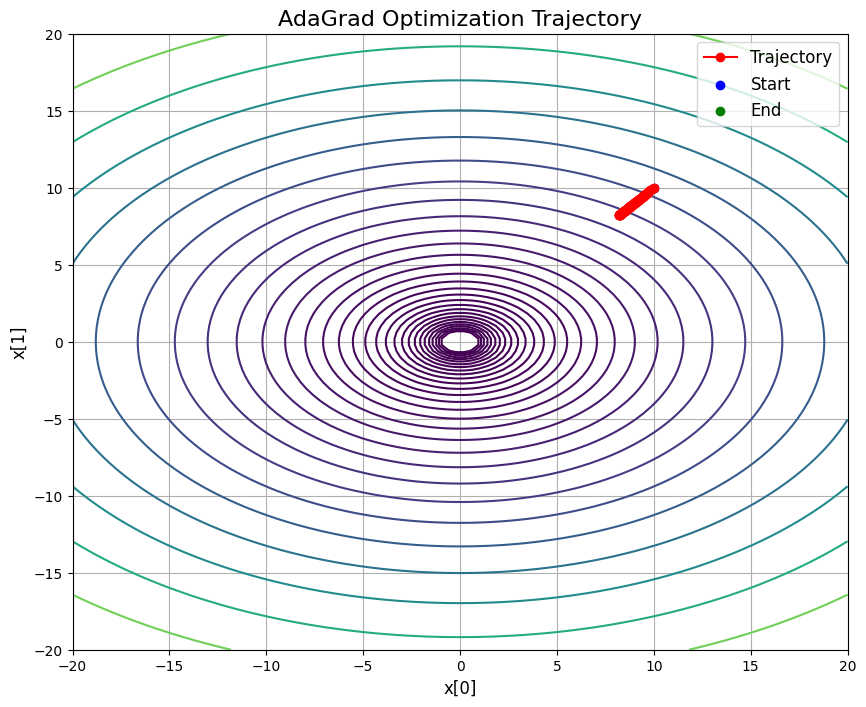

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the test function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Define the gradient of the test function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Define a grid of points to evaluate the cost function
X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = f(np.array([X, Y]))

# Set the initial values of x
x = np.array([10, 10], dtype=float) # Change the dtype to float

# Set the learning rate and the initial value of the sum of the squares of the gradients
learning_rate = 0.1
sum_squares_gradients = np.zeros_like(x)

# Initialize a list to store the values of x at each iteration
x_values = [x.copy()]

# Perform AdaGrad optimization for a fixed number of iterations
for i in range(100):
    gradient = grad_f(x)  # Compute the gradient of the cost function
    sum_squares_gradients += gradient**2  # Update the sum of squared gradients
    x -= learning_rate * gradient / (np.sqrt(sum_squares_gradients) + 1e-7)  # Update parameters
    x_values.append(x.copy())  # Store the updated parameters

# Convert the list of x values to a numpy array
x_values = np.array(x_values)

# Plot the cost function and optimization trajectory
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, np.log10(Z.max()), 30), cmap='viridis')  # Contour plot
plt.plot(x_values[:, 0], x_values[:, 1], '-o', color='red', label='Trajectory')  # Trajectory
plt.scatter(x_values[0, 0], x_values[0, 1], color='blue', label='Start')  # Starting point
plt.scatter(x_values[-1, 0], x_values[-1, 1], color='green', label='End')  # Ending point
plt.title("AdaGrad Optimization Trajectory", fontsize=16)
plt.xlabel("x[0]", fontsize=12)
plt.ylabel("x[1]", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## 2. **RMSProp**

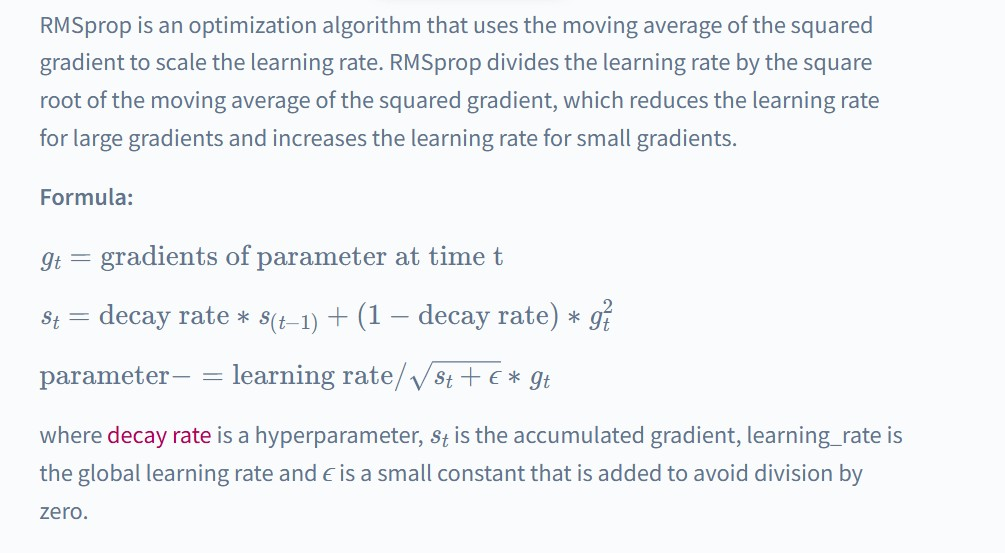

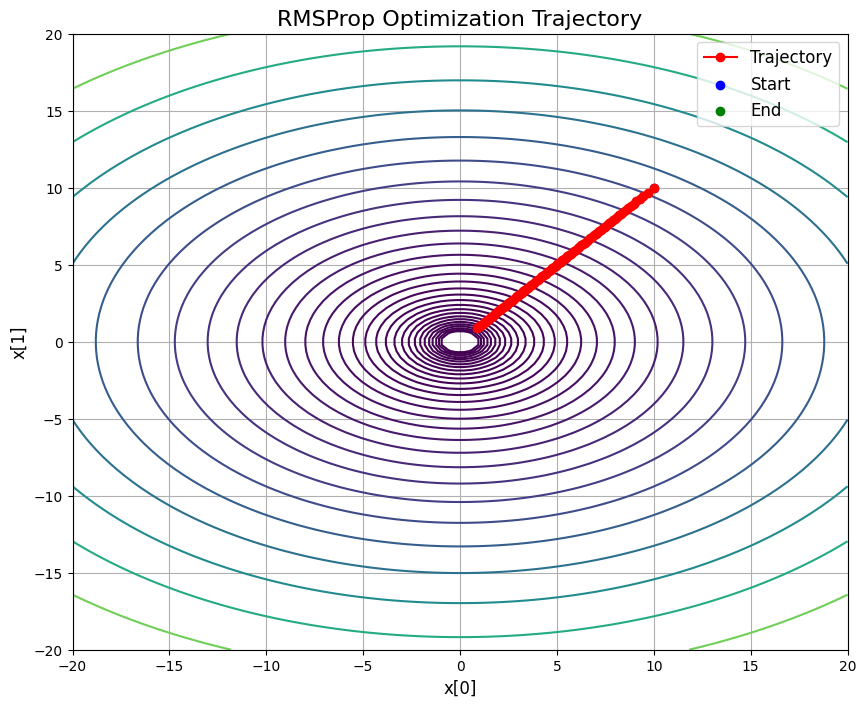

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the test function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Define the gradient of the test function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Define a grid of points to evaluate the cost function
X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = f(np.array([X, Y]))

# Set the initial values of x
x = np.array([10, 10], dtype=float)

# RMSProp hyperparameters
learning_rate = 0.1  # Learning rate
beta = 0.9  # Decay rate for moving average
epsilon = 1e-7  # Small value to prevent division by zero
moving_avg_squares = np.zeros_like(x)  # Initialize the moving average of squared gradients

# Initialize a list to store the values of x at each iteration
x_values = [x.copy()]

# Perform RMSProp optimization for a fixed number of iterations
for i in range(100):
    gradient = grad_f(x)  # Compute the gradient of the cost function
    # Update the moving average of the squared gradients
    moving_avg_squares = beta * moving_avg_squares + (1 - beta) * (gradient**2)
    # Update the parameters using RMSProp
    x -= learning_rate * gradient / (np.sqrt(moving_avg_squares) + epsilon)
    # Store the updated parameters
    x_values.append(x.copy())

# Convert the list of x values to a numpy array
x_values = np.array(x_values)

# Plot the cost function and optimization trajectory
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, np.log10(Z.max()), 30), cmap='viridis')  # Contour plot
plt.plot(x_values[:, 0], x_values[:, 1], '-o', color='red', label='Trajectory')  # Trajectory
plt.scatter(x_values[0, 0], x_values[0, 1], color='blue', label='Start')  # Starting point
plt.scatter(x_values[-1, 0], x_values[-1, 1], color='green', label='End')  # Ending point
plt.title("RMSProp Optimization Trajectory", fontsize=16)
plt.xlabel("x[0]", fontsize=12)
plt.ylabel("x[1]", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


## 3. **AdaDelta**

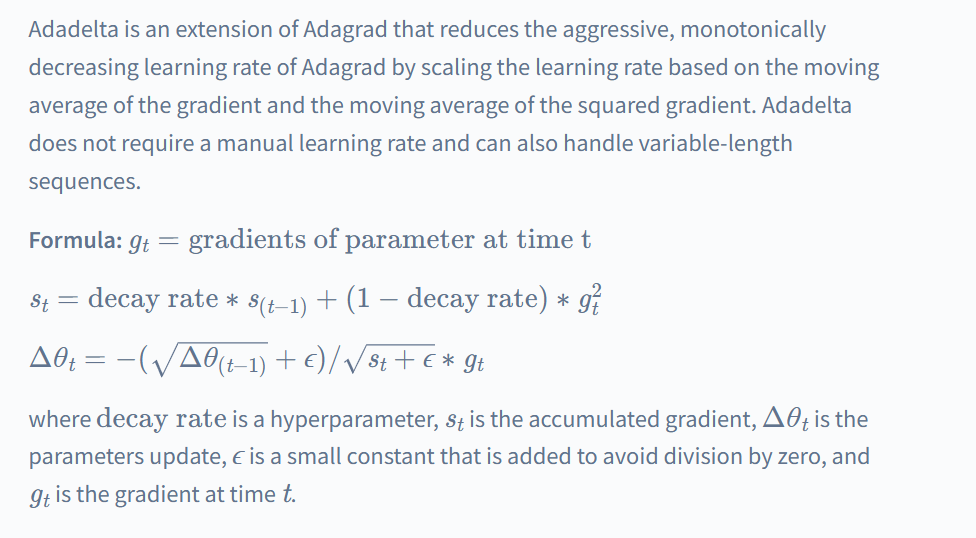

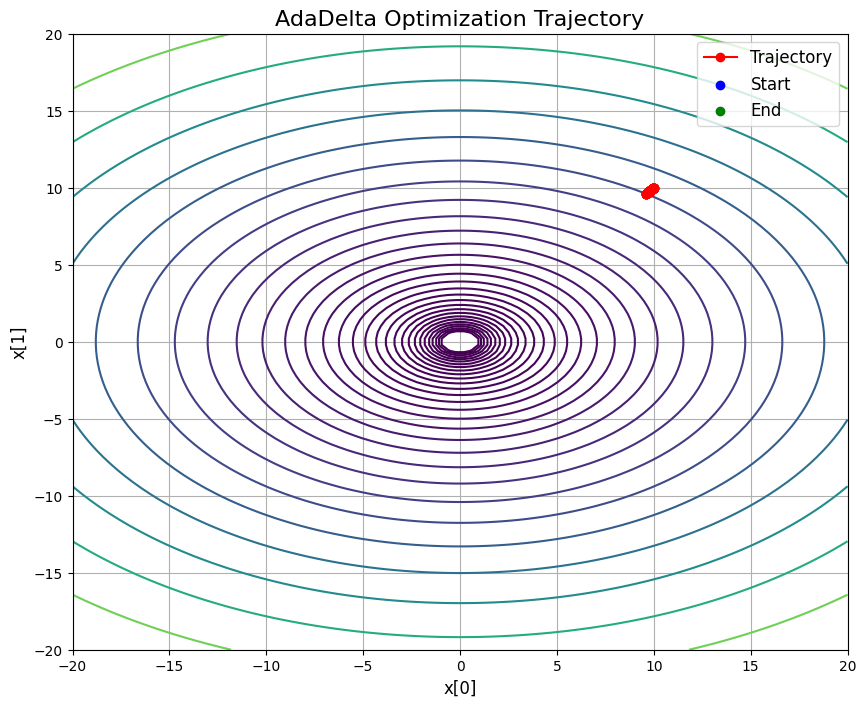

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the test function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Define the gradient of the test function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Define a grid of points to evaluate the cost function
X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = f(np.array([X, Y]))

# Set the initial values of x
x = np.array([10, 10],dtype=float)

# AdaDelta hyperparameters
beta = 0.9  # Decay rate for the moving average
epsilon = 1e-6  # Small value to prevent division by zero

# Initialize accumulators for squared gradients and updates
accumulated_gradients = np.zeros_like(x)
accumulated_updates = np.zeros_like(x)

# Initialize a list to store the values of x at each iteration
x_values = [x.copy()]

# Perform AdaDelta optimization for a fixed number of iterations
for i in range(100):
    gradient = grad_f(x)  # Compute the gradient of the cost function

    # Update the moving average of the squared gradients
    accumulated_gradients = beta * accumulated_gradients + (1 - beta) * gradient**2

    # Compute the root-mean-squared (RMS) gradient and update
    rms_gradient = np.sqrt(accumulated_gradients + epsilon)
    rms_update = np.sqrt(accumulated_updates + epsilon)

    # Compute the adaptive learning rate and update x
    adaptive_update = -(rms_update / rms_gradient) * gradient
    x += adaptive_update

    # Update the moving average of the squared updates
    accumulated_updates = beta * accumulated_updates + (1 - beta) * adaptive_update**2

    # Store the updated parameters
    x_values.append(x.copy())

# Convert the list of x values to a numpy array
x_values = np.array(x_values)

# Plot the cost function and optimization trajectory
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, np.log10(Z.max()), 30), cmap='viridis')  # Contour plot
plt.plot(x_values[:, 0], x_values[:, 1], '-o', color='red', label='Trajectory')  # Trajectory
plt.scatter(x_values[0, 0], x_values[0, 1], color='blue', label='Start')  # Starting point
plt.scatter(x_values[-1, 0], x_values[-1, 1], color='green', label='End')  # Ending point
plt.title("AdaDelta Optimization Trajectory", fontsize=16)
plt.xlabel("x[0]", fontsize=12)
plt.ylabel("x[1]", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


## 4. **Adam**

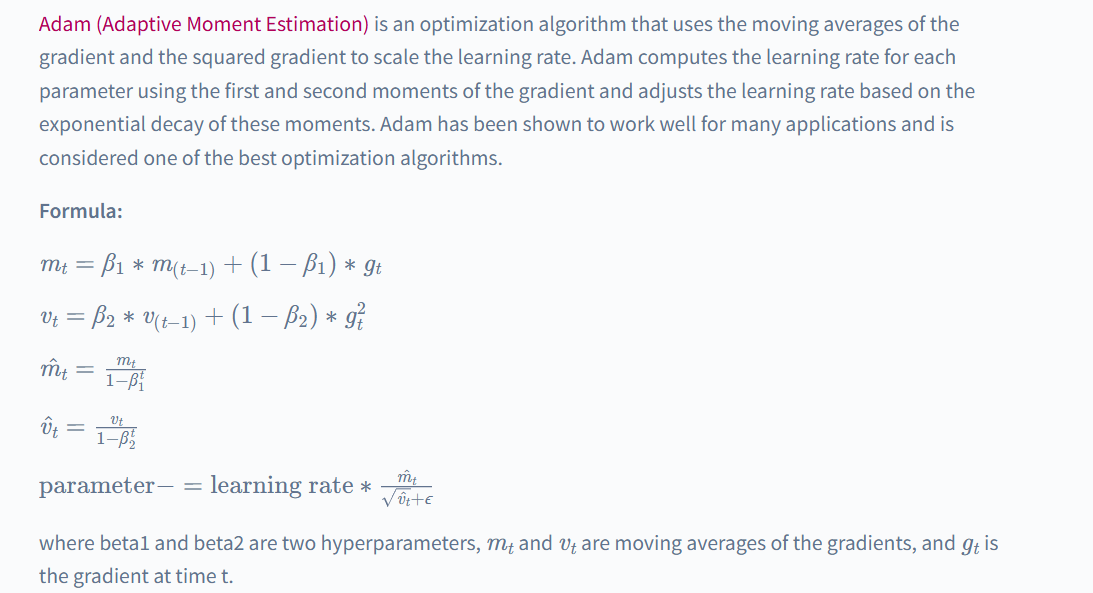

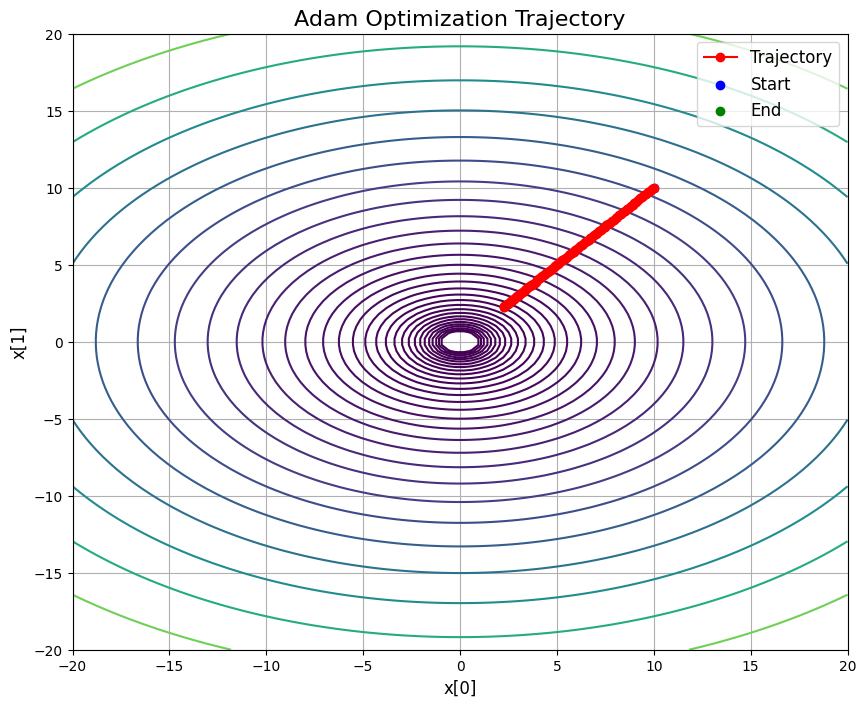

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the test function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Define the gradient of the test function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Define a grid of points to evaluate the cost function
X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = f(np.array([X, Y]))

# Set the initial values of x
x = np.array([10.0, 10.0], dtype=float)

# Adam hyperparameters
learning_rate = 0.1
beta1 = 0.9  # Exponential decay rate for the first moment
beta2 = 0.999  # Exponential decay rate for the second moment
epsilon = 1e-8  # Small value to prevent division by zero

# Initialize moments and timestep
m = np.zeros_like(x)  # First moment (mean of gradients)
v = np.zeros_like(x)  # Second moment (mean of squared gradients)
t = 0  # Timestep

# Initialize a list to store the values of x at each iteration
x_values = [x.copy()]

# Perform Adam optimization for a fixed number of iterations
for i in range(100):
    t += 1  # Increment timestep
    gradient = grad_f(x)  # Compute the gradient of the cost function

    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * gradient

    # Update biased second moment estimate
    v = beta2 * v + (1 - beta2) * (gradient**2)

    # Compute bias-corrected first and second moments
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    # Update parameters
    x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    # Store the updated parameters
    x_values.append(x.copy())

# Convert the list of x values to a numpy array
x_values = np.array(x_values)

# Plot the cost function and optimization trajectory
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, np.log10(Z.max()), 30), cmap='viridis')  # Contour plot
plt.plot(x_values[:, 0], x_values[:, 1], '-o', color='red', label='Trajectory')  # Trajectory
plt.scatter(x_values[0, 0], x_values[0, 1], color='blue', label='Start')  # Starting point
plt.scatter(x_values[-1, 0], x_values[-1, 1], color='green', label='End')  # Ending point
plt.title("Adam Optimization Trajectory", fontsize=16)
plt.xlabel("x[0]", fontsize=12)
plt.ylabel("x[1]", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


## 5. **Nadam**

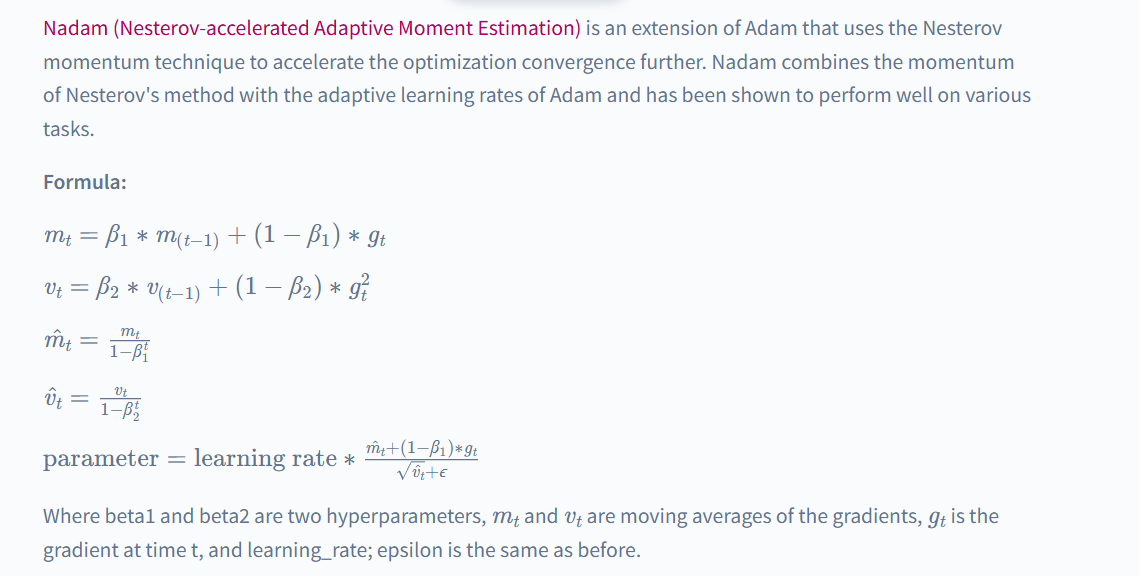

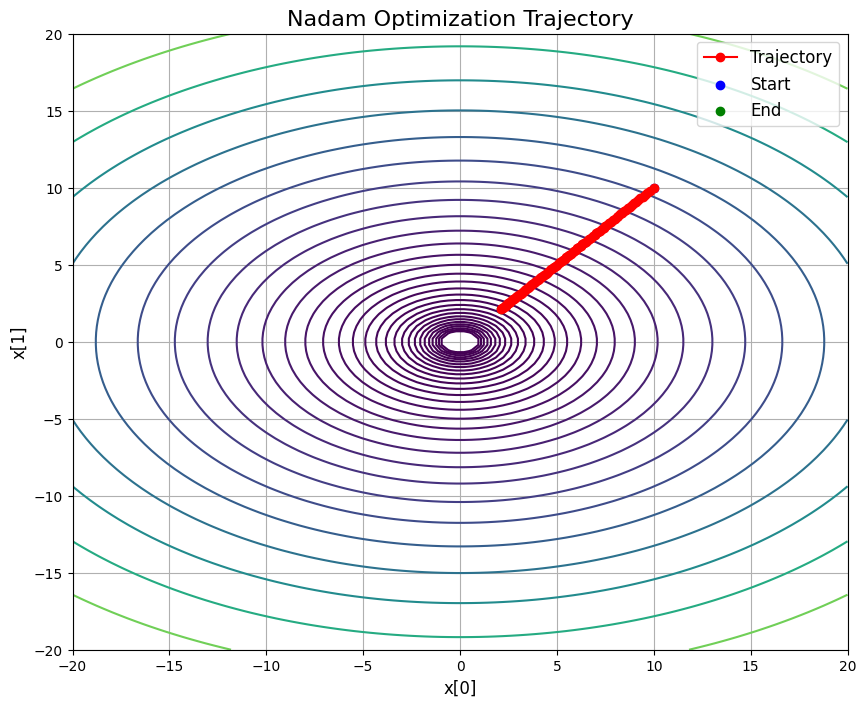

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the test function
def f(x):
    return x[0]**2 + 2*x[1]**2

# Define the gradient of the test function
def grad_f(x):
    return np.array([2*x[0], 4*x[1]])

# Define a grid of points to evaluate the cost function
X, Y = np.meshgrid(np.linspace(-20, 20, 100), np.linspace(-20, 20, 100))
Z = f(np.array([X, Y]))

# Set the initial values of x
x = np.array([10.0, 10.0], dtype=float)

# Nadam hyperparameters
learning_rate = 0.1
beta1 = 0.9  # Exponential decay rate for the first moment
beta2 = 0.999  # Exponential decay rate for the second moment
epsilon = 1e-8  # Small value to prevent division by zero

# Initialize moments and timestep
m = np.zeros_like(x)  # First moment (mean of gradients)
v = np.zeros_like(x)  # Second moment (mean of squared gradients)
t = 0  # Timestep

# Initialize a list to store the values of x at each iteration
x_values = [x.copy()]

# Perform Nadam optimization for a fixed number of iterations
for i in range(100):
    t += 1  # Increment timestep
    gradient = grad_f(x)  # Compute the gradient of the cost function

    # Update biased first moment estimate
    m = beta1 * m + (1 - beta1) * gradient

    # Update biased second moment estimate
    v = beta2 * v + (1 - beta2) * (gradient**2)

    # Compute bias-corrected first and second moments
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    # Compute the Nesterov update for the first moment
    m_nesterov = beta1 * m_hat + (1 - beta1) * gradient / (1 - beta1**t)

    # Update parameters
    x -= learning_rate * m_nesterov / (np.sqrt(v_hat) + epsilon)

    # Store the updated parameters
    x_values.append(x.copy())

# Convert the list of x values to a numpy array
x_values = np.array(x_values)

# Plot the cost function and optimization trajectory
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, np.log10(Z.max()), 30), cmap='viridis')  # Contour plot
plt.plot(x_values[:, 0], x_values[:, 1], '-o', color='red', label='Trajectory')  # Trajectory
plt.scatter(x_values[0, 0], x_values[0, 1], color='blue', label='Start')  # Starting point
plt.scatter(x_values[-1, 0], x_values[-1, 1], color='green', label='End')  # Ending point
plt.title("Nadam Optimization Trajectory", fontsize=16)
plt.xlabel("x[0]", fontsize=12)
plt.ylabel("x[1]", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()


## RMSProp Activation over Additional function

iteration: 0  |  (x,y) = ([0.54064896 0.340649  ])  |  eval_value = 0.40834
iteration: 1  |  (x,y) = ([0.24501018 0.27929536])  |  eval_value = 0.13804
iteration: 2  |  (x,y) = ([0.23935992 0.23417693])  |  eval_value = 0.11213
iteration: 3  |  (x,y) = ([0.19767195 0.19863849])  |  eval_value = 0.07853
iteration: 4  |  (x,y) = ([0.16964129 0.16964301])  |  eval_value = 0.05756
iteration: 5  |  (x,y) = ([0.14537973 0.145492  ])  |  eval_value = 0.04230
iteration: 6  |  (x,y) = ([0.12503593 0.12511178])  |  eval_value = 0.03129
iteration: 7  |  (x,y) = ([0.10769972 0.10776512])  |  eval_value = 0.02321
iteration: 8  |  (x,y) = ([0.09286006 0.09291479])  |  eval_value = 0.01726
iteration: 9  |  (x,y) = ([0.08010512 0.08015162])  |  eval_value = 0.01284
iteration: 10  |  (x,y) = ([0.06911364 0.06915332])  |  eval_value = 0.00956
iteration: 11  |  (x,y) = ([0.05962546 0.05965946])  |  eval_value = 0.00711
iteration: 12  |  (x,y) = ([0.05142626 0.05145547])  |  eval_value = 0.00529
iteration

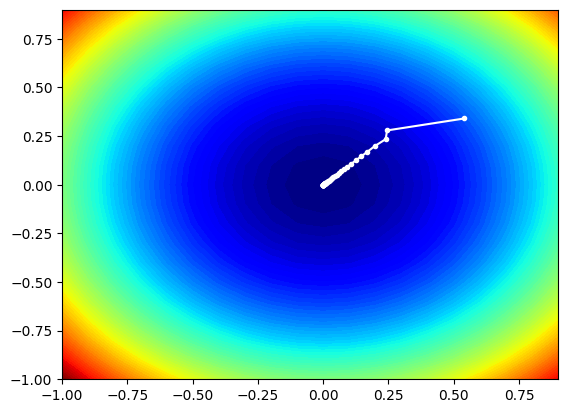

In [1]:
from math import sqrt
from numpy import asarray,arange,meshgrid
from numpy.random import rand, seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# target function is a simple second-degree equation
def objective_function(x, y):
	return x**2.0 + y**2.0

# function to find the derivative of target function x**2 +y**2
def derivative_function(x, y):
	return asarray([x * 2.0, y * 2.0])

# RMSProp algorithm
def RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, Beta):
	# list of all solution points
	all_solutions_list = list()
	# initial point generation within the range
	current_solution_point = values_range[:, 0] + rand(len(values_range)) * (values_range[:, 1] - values_range[:, 0])
	# squared gradients average
	squared_gradient_avg = [0.0 for _ in range(values_range.shape[0])]
	#Gradient Descent Algorithm looped n times
	for n in range(n_iterations):

		gradient = derivative_function(current_solution_point[0], current_solution_point[1])
		# loop to calculate the average of the squared gradients
		for i in range(gradient.shape[0]):
			squared_gradient = gradient[i]**2.0
			squared_gradient_avg[i] = (squared_gradient_avg[i] * Beta) + (squared_gradient * (1.0-Beta))

		# update solution point with squared gradient average
		updated_solution = list()
		for j in range(current_solution_point.shape[0]):
			# Learning rate calculation
			alpha = step_size / (1e-8 + sqrt(squared_gradient_avg[j]))
			# update solution point
			updated_value = current_solution_point[i] - alpha * gradient[j]
			updated_solution.append(updated_value)
		# Store updated solution
		current_solution_point = asarray(updated_solution)
		all_solutions_list.append(current_solution_point)
		# value of the function at updated solution point
		solution_eval_value = objective_function(current_solution_point[0], current_solution_point[1])

		print('iteration: %d  |  (x,y) = (%s)  |  eval_value = %.5f' % (n, current_solution_point, solution_eval_value))
	return all_solutions_list

# seed random number generator with any value
seed(1)
# min and max bounds of the input
values_range = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# number of iterations
n_iterations = 50
# step size
step_size = 0.01
# momentum for rmsprop, 0.99 works for most use cases
Beta = 0.99
# RMSProp gradient Descent
solutions = RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, Beta)

x_axis = arange(values_range[0,0], values_range[0,1], 0.1)
y_axis = arange(values_range[1,0], values_range[1,1], 0.1)

x, y = meshgrid(x_axis, y_axis)
# calculate results
results = objective_function(x, y)
# create a filled contour plot
plt.contourf(x, y, results, levels=80, cmap='jet')

all_solution_values = asarray(solutions)
# plot to trace solution points with each iteration
plt.plot(all_solution_values[:, 0], all_solution_values[:, 1], '.-', color='w')
plt.show()



Iteration: 1 | (x, y) = [-0.06595602  0.340649  ] | Value = 0.12039
Iteration: 2 | (x, y) = [-0.02886236  0.27929536] | Value = 0.07884
Iteration: 3 | (x, y) = [-0.01276125  0.23417693] | Value = 0.05500
Iteration: 4 | (x, y) = [-0.00562466  0.19863849] | Value = 0.03949
Iteration: 5 | (x, y) = [-0.00246486  0.16964301] | Value = 0.02878
Iteration: 6 | (x, y) = [-0.00107332  0.145492  ] | Value = 0.02117
Iteration: 7 | (x, y) = [-0.00046434  0.12511178] | Value = 0.01565
Iteration: 8 | (x, y) = [-0.00019955  0.10776512] | Value = 0.01161
Iteration: 9 | (x, y) = [-8.51860635e-05  9.29147925e-02] | Value = 0.00863
Iteration: 10 | (x, y) = [-3.61188240e-05  8.01516212e-02] | Value = 0.00642
Iteration: 11 | (x, y) = [-1.52095444e-05  6.91533161e-02] | Value = 0.00478
Iteration: 12 | (x, y) = [-6.36034309e-06  5.96594573e-02] | Value = 0.00356
Iteration: 13 | (x, y) = [-2.64113212e-06  5.14554696e-02] | Value = 0.00265
Iteration: 14 | (x, y) = [-1.08894956e-06  4.43619097e-02] | Value = 0.0

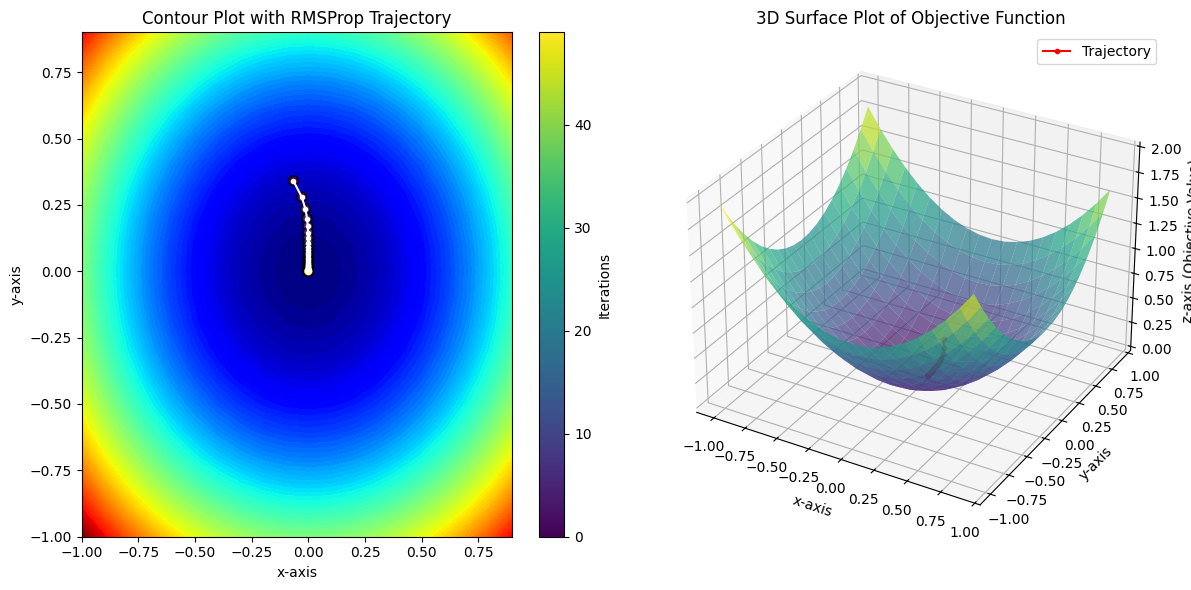

In [2]:
from math import sqrt
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Objective function: x^2 + y^2
def objective_function(x, y):
    return x**2.0 + y**2.0

# Derivative of the objective function
def derivative_function(x, y):
    return asarray([x * 2.0, y * 2.0])

# RMSProp Algorithm
def RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, beta):
    solutions = []  # List to store solutions
    # Initial random solution
    current_solution = values_range[:, 0] + rand(len(values_range)) * (values_range[:, 1] - values_range[:, 0])
    squared_gradient_avg = [0.0 for _ in range(values_range.shape[0])]

    # Gradient Descent loop
    for n in range(n_iterations):
        gradient = derivative_function(current_solution[0], current_solution[1])
        # Update squared gradient average
        for i in range(len(gradient)):
            squared_gradient_avg[i] = beta * squared_gradient_avg[i] + (1.0 - beta) * gradient[i]**2.0

        updated_solution = []
        for i in range(len(current_solution)):
            # Dynamic learning rate
            alpha = step_size / (sqrt(squared_gradient_avg[i]) + 1e-8)
            updated_value = current_solution[i] - alpha * gradient[i]
            updated_solution.append(updated_value)

        current_solution = asarray(updated_solution)
        solutions.append(current_solution)

        # Value of the function at the updated solution point
        solution_eval = objective_function(current_solution[0], current_solution[1])
        print(f"Iteration: {n+1} | (x, y) = {current_solution} | Value = {solution_eval:.5f}")

    return asarray(solutions)

# Seed random number generator
seed(1)

# Define input range
values_range = asarray([[-1.0, 1.0], [-1.0, 1.0]])

# RMSProp Parameters
n_iterations = 50
step_size = 0.01
beta = 0.99

# Run RMSProp
solutions = RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, beta)

# Prepare grid for visualization
x_axis = arange(values_range[0, 0], values_range[0, 1], 0.1)
y_axis = arange(values_range[1, 0], values_range[1, 1], 0.1)
x, y = meshgrid(x_axis, y_axis)
z = objective_function(x, y)

# Enhanced Visualization
fig = plt.figure(figsize=(12, 6))

# Contour Plot
ax1 = fig.add_subplot(121)
ax1.contourf(x, y, z, levels=80, cmap='jet')
ax1.set_title("Contour Plot with RMSProp Trajectory")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")

# Plot trajectory
solutions = asarray(solutions)
iterations = list(range(n_iterations))
scatter = ax1.scatter(
    solutions[:, 0], solutions[:, 1], c=iterations, cmap='viridis', edgecolors='black', s=50
)
colorbar = plt.colorbar(scatter, ax=ax1)
colorbar.set_label("Iterations")
ax1.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')

# 3D Surface Plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z, cmap='viridis', alpha=0.7)
ax2.set_title("3D Surface Plot of Objective Function")
ax2.set_xlabel("x-axis")
ax2.set_ylabel("y-axis")
ax2.set_zlabel("z-axis (Objective Value)")

# Plot trajectory in 3D
ax2.plot(solutions[:, 0], solutions[:, 1], objective_function(solutions[:, 0], solutions[:, 1]),
         '.-', color='r', label='Trajectory')
ax2.legend()

# Show plots
plt.tight_layout()
plt.show()


## RMSProp Activation with Interactive Visualization

In [3]:
from math import sqrt
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, ColorBar
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256
import numpy as np

# Objective function
def objective_function(x, y):
    return x**2.0 + y**2.0

# Derivative of the objective function
def derivative_function(x, y):
    return asarray([x * 2.0, y * 2.0])

# RMSProp Algorithm
def RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, beta):
    solutions = []
    current_solution = values_range[:, 0] + rand(len(values_range)) * (values_range[:, 1] - values_range[:, 0])
    squared_gradient_avg = [0.0 for _ in range(values_range.shape[0])]

    for _ in range(n_iterations):
        gradient = derivative_function(current_solution[0], current_solution[1])
        for i in range(len(gradient)):
            squared_gradient_avg[i] = beta * squared_gradient_avg[i] + (1.0 - beta) * gradient[i]**2.0

        updated_solution = []
        for i in range(len(current_solution)):
            alpha = step_size / (sqrt(squared_gradient_avg[i]) + 1e-8)
            updated_solution.append(current_solution[i] - alpha * gradient[i])

        current_solution = asarray(updated_solution)
        solutions.append(current_solution)
    return asarray(solutions)

# Seed random number generator
seed(1)

# Parameters
values_range = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iterations = 50
step_size = 0.01
beta = 0.99

# Run RMSProp
solutions = RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, beta)

# Grid for objective function
x_axis = arange(values_range[0, 0], values_range[0, 1], 0.01)
y_axis = arange(values_range[1, 0], values_range[1, 1], 0.01)
x, y = meshgrid(x_axis, y_axis)
z = objective_function(x, y)

# Prepare data for Bokeh
iterations = np.arange(len(solutions))
source = ColumnDataSource(data={
    "x": solutions[:, 0],
    "y": solutions[:, 1],
    "z": objective_function(solutions[:, 0], solutions[:, 1]),
    "iteration": iterations
})

# Create Bokeh plot
output_notebook()
p = figure(title="RMSProp Interactive Visualization (Bokeh)", width=800, height=600)
p.image(image=[z], x=-1, y=-1, dw=2, dh=2, palette="Viridis256", level="image")
p.scatter(
    x="x", y="y", size=8, source=source, fill_color=linear_cmap("iteration", Viridis256, 0, n_iterations - 1), line_color="white"
)

# Add color bar
color_mapper = linear_cmap("iteration", Viridis256, 0, n_iterations - 1).transform
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0, 0), title="Iteration")
p.add_layout(color_bar, "right")

p.xaxis.axis_label = "x-axis"
p.yaxis.axis_label = "y-axis"
show(p)


In [4]:
import plotly.graph_objects as go
from math import sqrt
from numpy import asarray, arange, meshgrid
from numpy.random import rand, seed
import numpy as np

# Objective function
def objective_function(x, y):
    return x**2.0 + y**2.0

# Derivative of the objective function
def derivative_function(x, y):
    return asarray([x * 2.0, y * 2.0])

# RMSProp Algorithm
def RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, beta):
    solutions = []
    current_solution = values_range[:, 0] + rand(len(values_range)) * (values_range[:, 1] - values_range[:, 0])
    squared_gradient_avg = [0.0 for _ in range(values_range.shape[0])]

    for _ in range(n_iterations):
        gradient = derivative_function(current_solution[0], current_solution[1])
        for i in range(len(gradient)):
            squared_gradient_avg[i] = beta * squared_gradient_avg[i] + (1.0 - beta) * gradient[i]**2.0

        updated_solution = []
        for i in range(len(current_solution)):
            alpha = step_size / (sqrt(squared_gradient_avg[i]) + 1e-8)
            updated_solution.append(current_solution[i] - alpha * gradient[i])

        current_solution = asarray(updated_solution)
        solutions.append(current_solution)
    return asarray(solutions)

# Seed random number generator
seed(1)

# Parameters
values_range = asarray([[-1.0, 1.0], [-1.0, 1.0]])
n_iterations = 50
step_size = 0.01
beta = 0.99

# Run RMSProp
solutions = RMSProp(objective_function, derivative_function, values_range, n_iterations, step_size, beta)

# Grid for objective function
x_axis = arange(values_range[0, 0], values_range[0, 1], 0.01)
y_axis = arange(values_range[1, 0], values_range[1, 1], 0.01)
x, y = meshgrid(x_axis, y_axis)
z = objective_function(x, y)

# Create 3D surface plot with trajectory
fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=z, x=x, y=y, colorscale="Viridis", opacity=0.7))

# Add optimization path
fig.add_trace(
    go.Scatter3d(
        x=solutions[:, 0],
        y=solutions[:, 1],
        z=objective_function(solutions[:, 0], solutions[:, 1]),
        mode="lines+markers",
        marker=dict(size=5, color=np.arange(len(solutions)), colorscale="Viridis"),
        line=dict(color="red", width=2),
        name="Optimization Path",
    )
)

fig.update_layout(
    title="RMSProp Interactive Visualization (Plotly)",
    scene=dict(xaxis_title="x-axis", yaxis_title="y-axis", zaxis_title="Objective Value"),
    width=900,
    height=700,
)

fig.show()
